In [1]:
# Importing spark libaries
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf

ModuleNotFoundError: No module named 'pyspark'

In [8]:
# Creating spark session, master nodes and context 
spark = SparkSession.builder\
 .master("local[*]")\
 .appName("ML Coursework")\
 .getOrCreate()
sc = spark.sparkContext


In [9]:
# Reading in the dataset in the spark nodes
df = spark.read.csv('/home/hadoop/Downloads/out_pat_data.csv', header = True, inferSchema = True)
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- X: integer (nullable = true)
 |-- encounter_id: integer (nullable = true)
 |-- patient_id: integer (nullable = true)
 |-- hospital_id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- bmi: double (nullable = true)
 |-- elective_surgery: integer (nullable = true)
 |-- ethnicity: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- height: double (nullable = true)
 |-- icu_admit_source: string (nullable = true)
 |-- icu_id: integer (nullable = true)
 |-- icu_stay_type: string (nullable = true)
 |-- icu_type: string (nullable = true)
 |-- pre_icu_los_days: double (nullable = true)
 |-- weight: double (nullable = true)
 |-- apache_2_diagnosis: integer (nullable = true)
 |-- apache_3j_diagnosis: double (nullable = true)
 |-- apache_post_operative: integer (nullable = true)
 |-- arf_apache: integer (nullable = true)
 |-- gcs_eyes_apache: integer (nullable = true)
 |-- gcs_motor_apache: integer (nullable = true)
 |

In [5]:
# Printing the headers
import pandas as pd
pd.DataFrame(df.take(5), columns = df.columns)

22/04/22 01:43:38 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
22/04/22 01:43:39 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , X, encounter_id, patient_id, hospital_id, age, bmi, elective_surgery, ethnicity, gender, height, icu_admit_source, icu_id, icu_stay_type, icu_type, pre_icu_los_days, weight, apache_2_diagnosis, apache_3j_diagnosis, apache_post_operative, arf_apache, gcs_eyes_apache, gcs_motor_apache, gcs_unable_apache, gcs_verbal_apache, heart_rate_apache, intubated_apache, map_apache, resprate_apache, temp_apache, ventilated_apache, d1_diasbp_max, d1_diasbp_min, d1_diasbp_noninvasive_max, d1_diasbp_noninvasive_min, d1_heartrate_max, d1_heartrate_min, d1_mbp_max, d1_mbp_min, d1_mbp_noninvasive_max, d1_mbp_noninvasive_min, d1_resprate_max, d1_resprate_min, d1_spo2_max, d1_spo2_min, d1_sysbp_max, d1_sysbp_min, d1_sysbp_noninvasive_max

,_c0,X,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,1,1,66154,25312,118,68,22.730000,0,Caucasian,M,...,0,1,0,0,0,0,0,Sepsis,Cardiovascular,0
1,2,2,114252,59342,81,77,27.420000,0,Caucasian,F,...,0,1,0,0,0,0,0,Respiratory,Respiratory,0
2,3,3,119783,50777,118,25,31.950000,0,Caucasian,F,...,0,0,0,0,0,0,0,Metabolic,Metabolic,0
3,4,4,79267,46918,118,81,22.640000,1,Caucasian,F,...,0,0,0,0,0,0,0,Cardiovascular,Cardiovascular,0
4,5,5,92056,34377,33,65,27.654655,0,Caucasian,M,...,0,0,0,0,0,0,0,Trauma,Trauma,0


In [10]:
# Dropping the unnecessary columns 
df = df.drop("_c0","encounter_id","patient_id","X","hospital_id","icu_id")
df = df.drop('icu_admit_source','icu_stay_type','icu_type')
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- bmi: double (nullable = true)
 |-- elective_surgery: integer (nullable = true)
 |-- ethnicity: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- height: double (nullable = true)
 |-- pre_icu_los_days: double (nullable = true)
 |-- weight: double (nullable = true)
 |-- apache_2_diagnosis: integer (nullable = true)
 |-- apache_3j_diagnosis: double (nullable = true)
 |-- apache_post_operative: integer (nullable = true)
 |-- arf_apache: integer (nullable = true)
 |-- gcs_eyes_apache: integer (nullable = true)
 |-- gcs_motor_apache: integer (nullable = true)
 |-- gcs_unable_apache: integer (nullable = true)
 |-- gcs_verbal_apache: integer (nullable = true)
 |-- heart_rate_apache: integer (nullable = true)
 |-- intubated_apache: integer (nullable = true)
 |-- map_apache: integer (nullable = true)
 |-- resprate_apache: double (nullable = true)
 |-- temp_apache: double (nullable = true)
 |-- ventilated_apache: integer (nullable = 

In [11]:
# Finding the distribution w.r.t target variable
df.groupBy("hospital_death").count().toPandas()

,hospital_death,count
0,1,7915
1,0,83798


In [20]:
# Assinging the variables according to their data type
numercial= ["age", "bmi", "height","pre_icu_los_days","weight","apache_3j_diagnosis","heart_rate_apache","temp_apache","d1_diasbp_max","d1_diasbp_min","d1_diasbp_noninvasive_max", "d1_diasbp_noninvasive_min","d1_heartrate_max","d1_heartrate_min","d1_mbp_max","d1_mbp_min","d1_mbp_noninvasive_max","d1_mbp_noninvasive_min","d1_resprate_max","d1_resprate_min","d1_spo2_max", "d1_spo2_min","d1_sysbp_max","d1_sysbp_min","d1_sysbp_noninvasive_max","d1_sysbp_noninvasive_min","d1_temp_max","d1_temp_min","h1_diasbp_max","h1_diasbp_min", "h1_heartrate_max", "h1_heartrate_min", "h1_resprate_max","h1_resprate_min", "h1_spo2_max", "h1_spo2_min","h1_sysbp_max","h1_sysbp_min","apache_2_diagnosis","map_apache"]
categorical= ['gcs_eyes_apache','gcs_motor_apache', 'gcs_verbal_apache','ethnicity','gender','apache_3j_bodysystem','apache_2_bodysystem']
binary=['elective_surgery', 'apache_post_operative', 'arf_apache','gcs_unable_apache','intubated_apache','ventilated_apache','aids','cirrhosis','diabetes_mellitus', 'hepatic_failure','immunosuppression', 'leukemia','lymphoma','solid_tumor_with_metastasis', 'hospital_death']

In [21]:
# Summary statistics of numerical data
df.select(numercial).describe().toPandas()

,summary,age,bmi,height,pre_icu_los_days,weight,apache_3j_diagnosis,heart_rate_apache,temp_apache,d1_diasbp_max,...,h1_heartrate_max,h1_heartrate_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,apache_2_diagnosis,map_apache
0,count,91713,91713,91713,91713,91713,91713,91713,91713,91713,...,91713,91713,91713,91713,91713,91713,91713,91713,91713,91713
1,mean,62.82776705592446,28.062517064743076,169.81423211539,0.15125759924148507,81.42027171720332,494.3448789159062,100.10521954357615,36.47179167620751,86.86166628504138,...,91.11405144308877,82.91109221157306,21.61770959405973,16.657845670733703,98.4052642482527,96.13617480618888,131.774677526632,115.54698897648097,184.25278859049425,87.78809983317524
2,stddev,15.879188668441499,6.133153100146238,10.464865253771801,0.1739624464148284,20.259070192688476,385.0101069759325,28.768378829151388,0.3554400921452297,17.06951453621551,...,19.868433660410307,18.949333270517123,5.555021912639141,4.413412019771965,1.8337107097579828,2.975512691426418,24.869270616113607,24.86359809079459,85.68600716484727,41.86060710928057
3,min,20,14.84492591,139.7,0.0,38.6,0.01,38,35.5,46,...,46,36,10,5,93,87,75,53,101,40
4,max,89,45.94839294,195.59,0.969444444,139.8,1413.02,169,37.44,135,...,147,135,38,29,100,100,201,185,308,200


In [22]:
# Summary statistics of categorical data
df.select(categorical).describe().toPandas()


,summary,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,ethnicity,gender,apache_3j_bodysystem,apache_2_bodysystem
0,count,91713,91713,91713,91713,91713,91713,91713
1,mean,3.476137515946485,5.482156291910634,4.015613926051923,None,None,None,None
2,stddev,0.9448783677822427,1.2771777201553152,1.550540028925784,None,None,None,None
3,min,1,1,1,African American,F,Cardiovascular,Cardiovascular
4,max,4,6,5,Other/Unknown,M,Trauma,Undefined diagnoses


In [23]:
# Binary data
df.select(binary).toPandas()

,elective_surgery,apache_post_operative,arf_apache,gcs_unable_apache,intubated_apache,ventilated_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
91709,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
91710,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
91711,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
# Assigning numerical data into a dataframe
numeric_data = df.select(numercial).toPandas()


Text(0.5, 1.0, 'Correlation Heatmap')

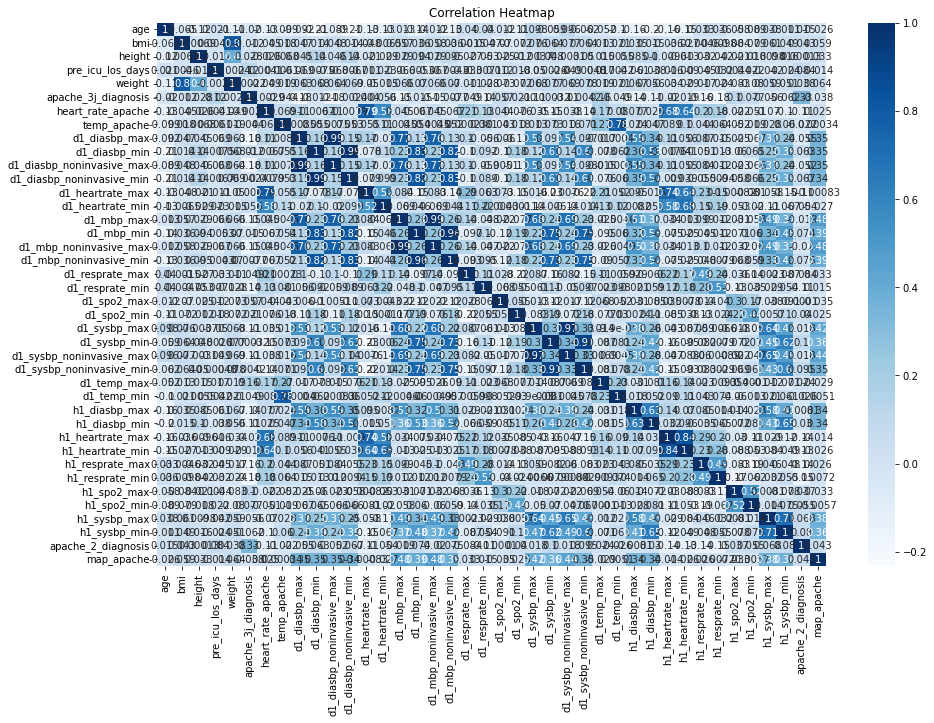

In [25]:
# Correlation Heatmap of numerical data
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,10))
sns.heatmap(numeric_data.corr(method = 'pearson'), annot = True, cmap = "Blues")
plt.title("Correlation Heatmap")

In [26]:
# Using stratified sampling to balance the target variables distribution 
from pyspark.sql import Row
from pyspark.sql import SparkSession

df_s = df.sampleBy("hospital_death", fractions={1: 0.9125, 0: 0.0875}, seed=0)

df_s.groupBy("hospital_death").count().toPandas()


,hospital_death,count
0,1,7257
1,0,7248


In [28]:
# Using String and Vector Assembler to obtain features and labels
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer

numericCols = ["age", "bmi", "height","pre_icu_los_days","weight","apache_3j_diagnosis","heart_rate_apache","temp_apache","d1_diasbp_max","d1_diasbp_min","d1_diasbp_noninvasive_max", "d1_diasbp_noninvasive_min","d1_heartrate_max","d1_heartrate_min","d1_mbp_max","d1_mbp_min","d1_mbp_noninvasive_max","d1_mbp_noninvasive_min","d1_resprate_max","d1_resprate_min","d1_spo2_max", "d1_spo2_min","d1_sysbp_max","d1_sysbp_min","d1_sysbp_noninvasive_max","d1_sysbp_noninvasive_min","d1_temp_max","d1_temp_min","h1_diasbp_max","h1_diasbp_min", "h1_heartrate_max", "h1_heartrate_min", "h1_resprate_max","h1_resprate_min", "h1_spo2_max", "h1_spo2_min","h1_sysbp_max","h1_sysbp_min","apache_2_diagnosis","map_apache"]
assembler = VectorAssembler(inputCols=numericCols, outputCol="features")
df1 = assembler.transform(df_s)
label_stringIdx = StringIndexer(inputCol = 'hospital_death', outputCol = 'label')
df2 = label_stringIdx.fit(df1).transform(df1)
df2.printSchema()

root
 |-- age: integer (nullable = true)
 |-- bmi: double (nullable = true)
 |-- elective_surgery: integer (nullable = true)
 |-- ethnicity: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- height: double (nullable = true)
 |-- pre_icu_los_days: double (nullable = true)
 |-- weight: double (nullable = true)
 |-- apache_2_diagnosis: integer (nullable = true)
 |-- apache_3j_diagnosis: double (nullable = true)
 |-- apache_post_operative: integer (nullable = true)
 |-- arf_apache: integer (nullable = true)
 |-- gcs_eyes_apache: integer (nullable = true)
 |-- gcs_motor_apache: integer (nullable = true)
 |-- gcs_unable_apache: integer (nullable = true)
 |-- gcs_verbal_apache: integer (nullable = true)
 |-- heart_rate_apache: integer (nullable = true)
 |-- intubated_apache: integer (nullable = true)
 |-- map_apache: integer (nullable = true)
 |-- resprate_apache: double (nullable = true)
 |-- temp_apache: double (nullable = true)
 |-- ventilated_apache: integer (nullable = 

In [29]:
# Splitting the data into Train & Test
train, test = df2.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))
train.printSchema()


Training Dataset Count: 10190


Test Dataset Count: 4315
root
 |-- age: integer (nullable = true)
 |-- bmi: double (nullable = true)
 |-- elective_surgery: integer (nullable = true)
 |-- ethnicity: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- height: double (nullable = true)
 |-- pre_icu_los_days: double (nullable = true)
 |-- weight: double (nullable = true)
 |-- apache_2_diagnosis: integer (nullable = true)
 |-- apache_3j_diagnosis: double (nullable = true)
 |-- apache_post_operative: integer (nullable = true)
 |-- arf_apache: integer (nullable = true)
 |-- gcs_eyes_apache: integer (nullable = true)
 |-- gcs_motor_apache: integer (nullable = true)
 |-- gcs_unable_apache: integer (nullable = true)
 |-- gcs_verbal_apache: integer (nullable = true)
 |-- heart_rate_apache: integer (nullable = true)
 |-- intubated_apache: integer (nullable = true)
 |-- map_apache: integer (nullable = true)
 |-- resprate_apache: double (nullable = true)
 |-- temp_apache: double (nullable = true)
 |-- ventilated_apa

In [30]:
# Decision Tree 
# import the Decision Tree classifier
from pyspark.ml.classification import DecisionTreeClassifier

# configuring and training the Decision Tree classifier using the training data
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train)
# Testing the performance of the Decision Tree classifier using the testing data
predictions = dtModel.transform(test)
predictions.select('label', 'prediction', 'rawPrediction', 'probability').show(10)

+-----+----------+---------------+--------------------+
|label|prediction|  rawPrediction|         probability|
+-----+----------+---------------+--------------------+
|  1.0|       1.0| [936.0,1059.0]|[0.46917293233082...|
|  1.0|       1.0|[1175.0,3024.0]|[0.27982853060252...|
|  1.0|       1.0|[1175.0,3024.0]|[0.27982853060252...|
|  0.0|       0.0|  [849.0,430.0]|[0.66379984362783...|
|  1.0|       1.0|[1175.0,3024.0]|[0.27982853060252...|
|  1.0|       1.0|[1175.0,3024.0]|[0.27982853060252...|
|  1.0|       1.0|[1175.0,3024.0]|[0.27982853060252...|
|  0.0|       0.0| [1568.0,340.0]|[0.82180293501048...|
|  1.0|       1.0|[1175.0,3024.0]|[0.27982853060252...|
|  1.0|       1.0|[1175.0,3024.0]|[0.27982853060252...|
+-----+----------+---------------+--------------------+
only showing top 10 rows



In [31]:
# Prediction Evaluation
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))
predictions.select("prediction", "label", "features").groupBy("prediction").count().show()

Test Area Under ROC 0.7183280605676194


+----------+-----+
|prediction|count|
+----------+-----+
|       0.0| 1614|
|       1.0| 2701|
+----------+-----+



In [32]:
# Random Forest 
from pyspark.ml.classification import RandomForestClassifier

# configuring and training the Random Forrest classifier using the training data
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train)

# Testing the performance of the Random Forest classifier using the testing data
predictions = rfModel.transform(test)
predictions.select('label', 'prediction', 'rawPrediction', 'probability').show(10)

+-----+----------+--------------------+--------------------+
|label|prediction|       rawPrediction|         probability|
+-----+----------+--------------------+--------------------+
|  1.0|       0.0|[12.2316722241447...|[0.61158361120723...|
|  1.0|       1.0|[4.76007472668705...|[0.23800373633435...|
|  1.0|       1.0|[5.83175824790515...|[0.29158791239525...|
|  0.0|       1.0|[9.65602131005992...|[0.48280106550299...|
|  1.0|       1.0|[6.18728342410002...|[0.30936417120500...|
|  1.0|       1.0|[6.34290587365483...|[0.31714529368274...|
|  1.0|       1.0|[4.58641732980744...|[0.22932086649037...|
|  0.0|       0.0|[16.3376640990142...|[0.81688320495071...|
|  1.0|       1.0|[6.30561088870778...|[0.31528054443538...|
|  1.0|       1.0|[5.59675514533724...|[0.27983775726686...|
+-----+----------+--------------------+--------------------+
only showing top 10 rows



In [33]:
# Predicition evaluation
from pyspark.ml.evaluation import RegressionEvaluator

predictions.select("prediction", "label", "features").groupBy("prediction").count().show()
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

+----------+-----+
|prediction|count|
+----------+-----+
|       0.0| 1986|
|       1.0| 2329|
+----------+-----+



Test Area Under ROC 0.7948388132280665


In [34]:
# Gradient Boosted Tree
# import the Gradient-Boosted Tree classifier
from pyspark.ml.classification import GBTClassifier
# configuring and training the Gradient-Boosted Tree classifier using the training data
gbt = GBTClassifier(maxIter=10)
gbtModel = gbt.fit(train)
# Testing the performance of the Gradient-Boosted Tree classifier using the testing data
predictions = gbtModel.transform(test)
predictions.select('label', 'prediction', 'rawPrediction', 'probability').show(10)


+-----+----------+--------------------+--------------------+
|label|prediction|       rawPrediction|         probability|
+-----+----------+--------------------+--------------------+
|  1.0|       1.0|[-0.4066098330256...|[0.30720482907578...|
|  1.0|       1.0|[-0.6633684161141...|[0.20969964370191...|
|  1.0|       1.0|[-0.6219225380714...|[0.22376740380395...|
|  0.0|       1.0|[-0.1727926806145...|[0.41445336725938...|
|  1.0|       1.0|[-0.7367061795487...|[0.18642450617652...|
|  1.0|       1.0|[-0.9191902897057...|[0.13724293118834...|
|  1.0|       1.0|[-1.0356804341841...|[0.11191171382722...|
|  0.0|       0.0|[1.05870265521670...|[0.89258340846433...|
|  1.0|       1.0|[-0.4886251689695...|[0.27343771728974...|
|  1.0|       1.0|[-1.0304685054731...|[0.11295191335101...|
+-----+----------+--------------------+--------------------+
only showing top 10 rows



22/04/22 02:58:59 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
22/04/22 02:58:59 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


In [35]:
# Predicition evaluation
predictions.select("prediction", "label", "features").groupBy("prediction").count().show()
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))


+----------+-----+
|prediction|count|
+----------+-----+
|       0.0| 2082|
|       1.0| 2233|
+----------+-----+



Test Area Under ROC 0.8069709013808019
